In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns

%matplotlib inline

# first version of feature selection

After taking a first glance at the data, a couple of variables already seem unnecessary. The seller for instance. After dropping the, to us, useless variables, we plotted some of the variables to see the distribution of these variables.

In [3]:
df_car = pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')

df_car.drop(['model', 'notRepairedDamage', 'offerType', 'seller', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'monthOfRegistration', 'postalCode', 'dateCreated'], axis='columns', inplace=True)
df = df_car.dropna()

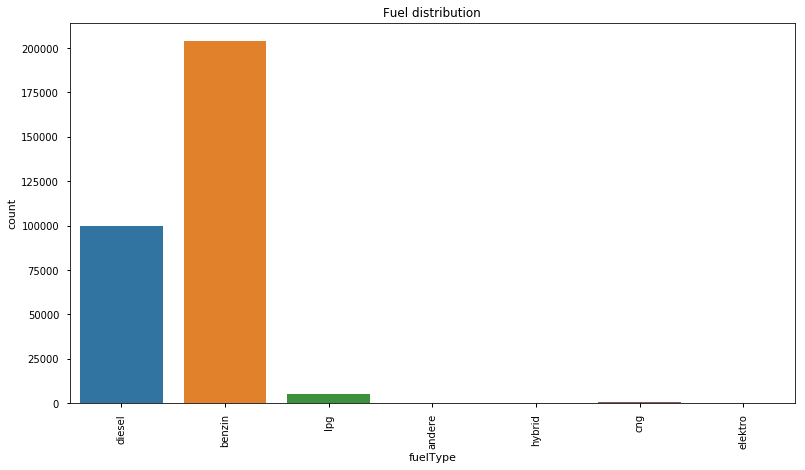

In [3]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
plt.title('Fuel distribution')
g = sns.countplot(df_car['fuelType'])
rotg = g.set_xticklabels(g.get_xticklabels(), rotation=90)

Because there are no cars with fuelType 'andere', 'elektro' and 'hybrid', we choose to let these types of Fuel go. We did find it a bit odd that there were no cars with hybrid or elektromotor. 

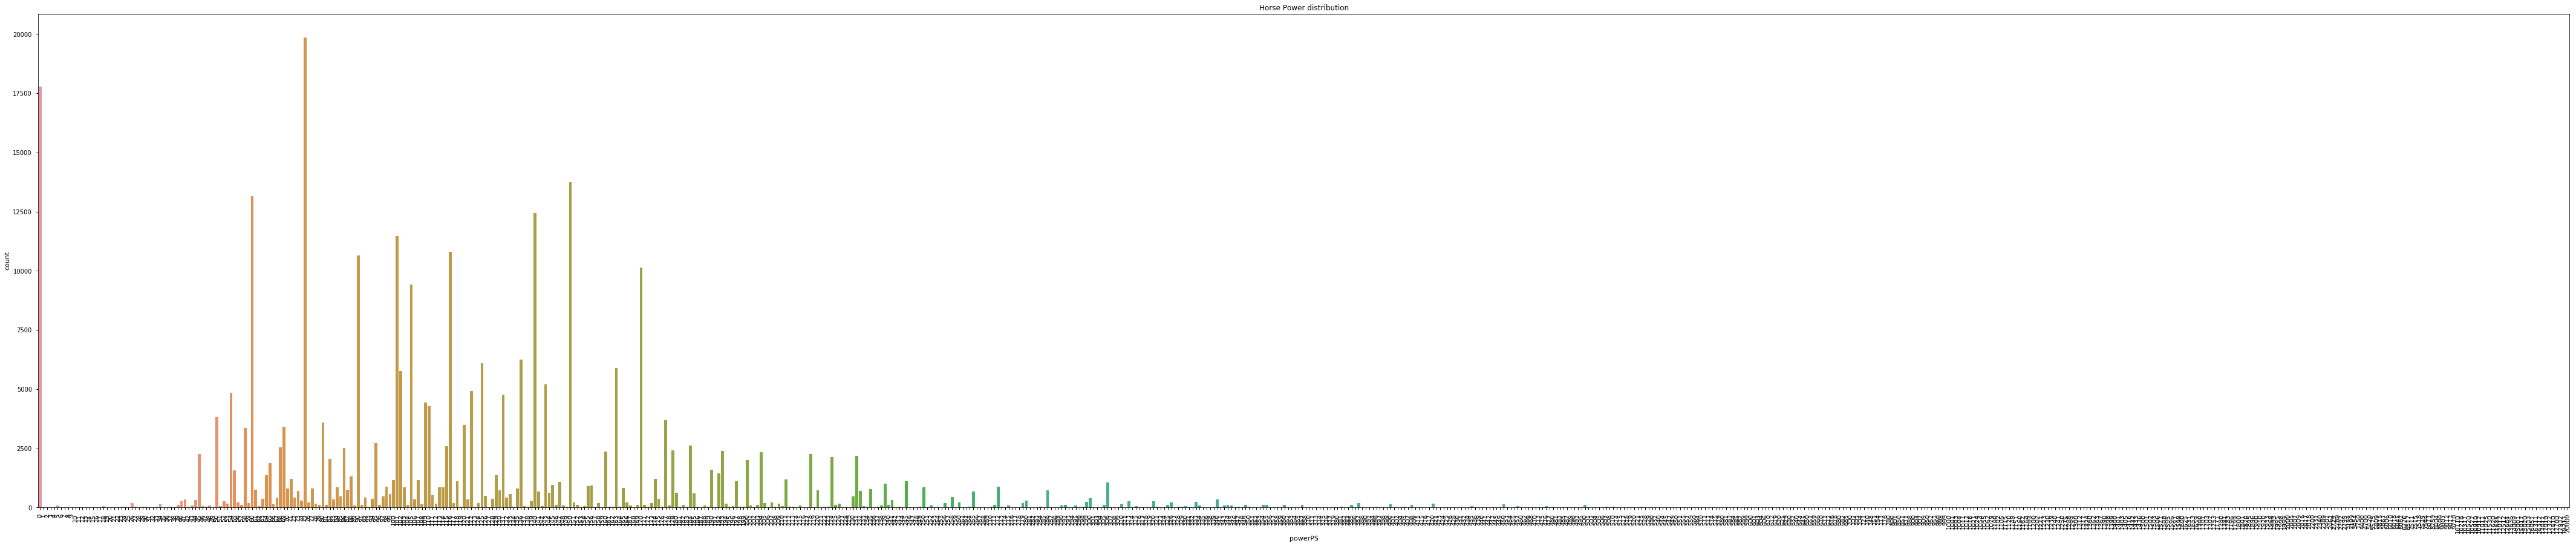

In [4]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(75,15))
plt.title('Horse Power distribution')
g = sns.countplot(df_car['powerPS'])
rotg = g.set_xticklabels(g.get_xticklabels(), rotation=90)

Again, when plotting the counts of how many times each amount of horsepower occurs, there can be seen that above the 450 horsepower, hardly any car occurs with an amount that high. Because we want to ensure that some existing supercar like porsche can still occur, we let the range of horsepower go to 600.

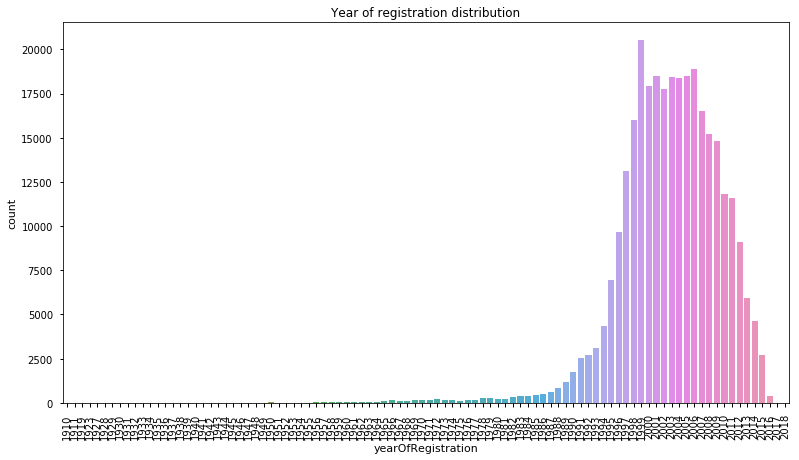

In [5]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
plt.title('Year of registration distribution')
g = sns.countplot(df_car['yearOfRegistration'])
rotg = g.set_xticklabels(g.get_xticklabels(), rotation=90)

When looking at the distribution of the year the car was built, there are very little cars on the very left. From around 1957, the count slightly goes up. That is why we choose to have a range beginning at 1957. We ended the range at 2016 because there are only two cars build in 2017 and strangely also a used car made in 2018 is sold. 

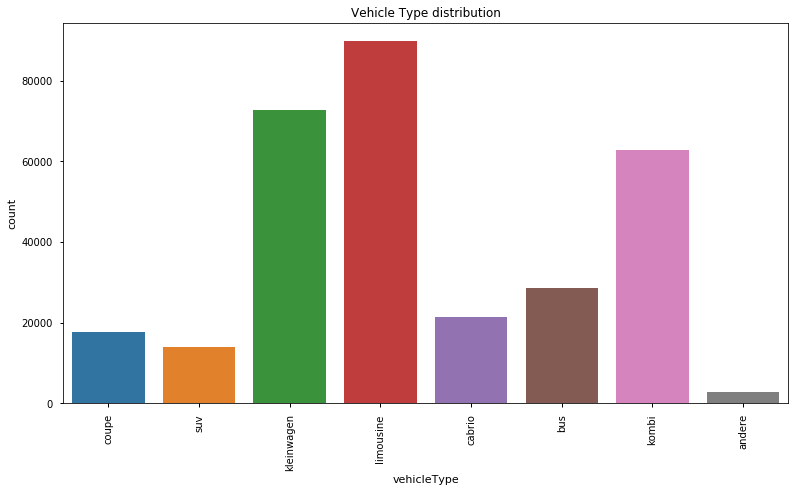

In [6]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
plt.title('Vehicle Type distribution')
g = sns.countplot(df_car['vehicleType'])
rotg = g.set_xticklabels(g.get_xticklabels(), rotation=90)

When looking at the distribution of car types, the category 'andere' occurs. This is a category which is useless for price classification, since in this category everything is possibile. We thus choose to drop this category, which holds in a remaining 7 car categories.

price min:  0
price max:  2147483647


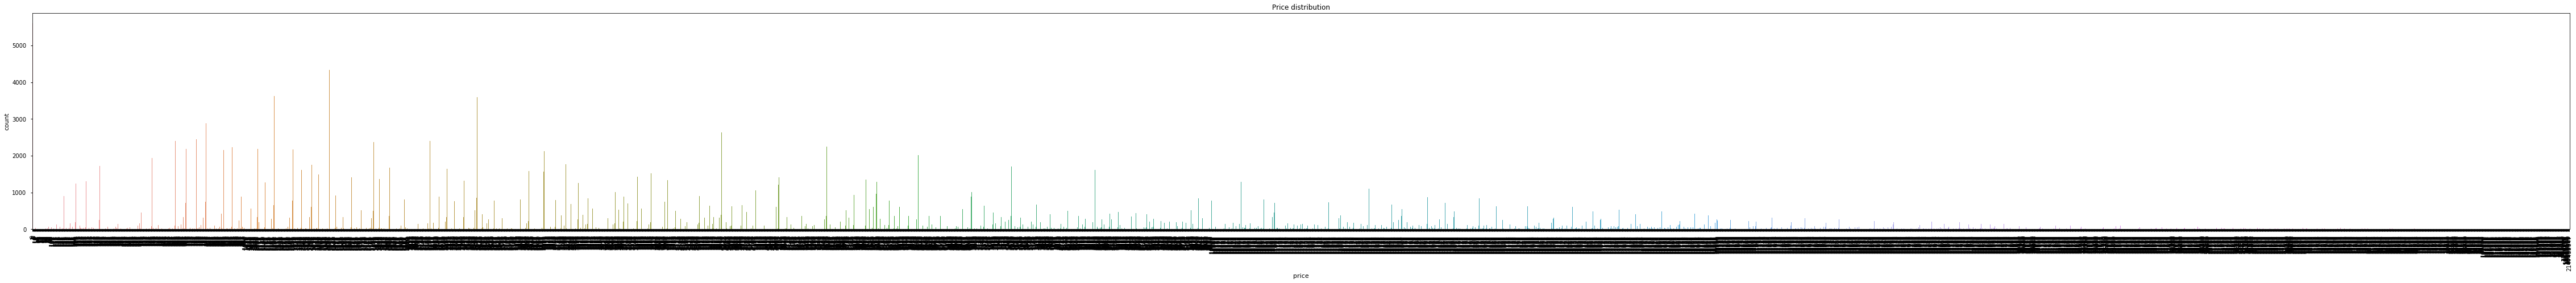

In [7]:
print("price min: " , df_car['price'].min())
print("price max: " , df_car['price'].max())
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(80,7))
plt.title('Price distribution')
g = sns.countplot(df_car['price'])
rotg = g.set_xticklabels(g.get_xticklabels(), rotation=90)

When looking at the distribution of the price of the car, a first weird thing that is visible, are the minimum and maximum price. a minimum price of zero is not realsitic. Also the price of 2147483647 is not really thrustworthy. A further inspection is thus needed. Also we inspected a couple of second hand car sites. This site learned that there are really cheap used cars, so the minimum value, we chooose 500. For a maximumvalue, we looked at the data and where the count of cars started to become really low. Because again, we also want some supercars, we set the maximum value of the price of a car to 250000. 

In [5]:
# In this cell, all the thresholds, as discussed earlier, are being set into the new dataframe, which is called, df_cars_new. 

df_cars_new = df[(df.price > 499)&(df.price < 250000)& (df.powerPS > 10) & (df.powerPS < 600)&(df.vehicleType != 'andere')&(df.fuelType != 'andere')&(df.fuelType != 'hybrid')&(df.fuelType != 'elektro')&(df.yearOfRegistration > 1956)&(df.yearOfRegistration < 2017)&(df.brand != 'sonstige_autos')]

print("kilometers minimum: " , df_cars_new['kilometer'].min())
print("kilometers maximum: " , df_cars_new['kilometer'].max())
print("Fuel Types: " , df_cars_new['fuelType'].unique())
print("Brands of cars: " , df_cars_new['brand'].unique())
print("Oldest car from year: " , df_cars_new['yearOfRegistration'].min())
print("Newest car from year: " , df_cars_new['yearOfRegistration'].max())
print("price minimum: " , df_cars_new['price'].min())
print("price maximum: " , df_cars_new['price'].max())
print("type of cars: " , df_cars_new['vehicleType'].unique())
print("gearbox types: " , df_cars_new['gearbox'].unique())
print("HorsePower minimum: " , df_cars_new['powerPS'].min())
print("HorsePower maximum: " , df_cars_new['powerPS'].max())

kilometers minimum:  5000
kilometers maximum:  150000
Fuel Types:  ['diesel' 'benzin' 'lpg' 'cng']
Brands of cars:  ['audi' 'jeep' 'volkswagen' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda' 'nissan'
 'renault' 'mercedes_benz' 'honda' 'fiat' 'mini' 'smart' 'subaru' 'volvo'
 'mitsubishi' 'opel' 'hyundai' 'alfa_romeo' 'kia' 'seat' 'suzuki' 'lancia'
 'porsche' 'citroen' 'toyota' 'chevrolet' 'dacia' 'daihatsu' 'chrysler'
 'jaguar' 'rover' 'saab' 'daewoo' 'land_rover' 'trabant' 'lada']
Oldest car from year:  1957
Newest car from year:  2016
price minimum:  500
price maximum:  249000
type of cars:  ['coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi']
gearbox types:  ['manuell' 'automatik']
HorsePower minimum:  11
HorsePower maximum:  589


In [17]:
# A sample frame to check if the data still is in the right format

df_cars_new.sample(10)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand
239749,Mercedes_Benz_SLK_230_Kompressor,950,cabrio,1997,automatik,207,150000,benzin,mercedes_benz
100607,Volkswagen_Golf_1.6_TDI_DPF_Xenon_Navi_Sitzh_F...,9499,limousine,2011,manuell,105,150000,diesel,volkswagen
3704,Seat_leon_05.2003_1900TDI_110ps,3290,limousine,2003,manuell,110,150000,diesel,seat
110797,Mercedes_A_180_CDI,1200,kleinwagen,2002,automatik,70,150000,diesel,mercedes_benz
263952,Volkswagen_Multivan_Kurz_Match,31000,bus,2012,manuell,140,60000,diesel,volkswagen
303571,Opel_Astra_GTC,6500,coupe,2006,manuell,140,125000,benzin,opel
337871,Mazda_6_1.8_Exclusive_1.Vorbesitzer_Klima_Euro_4,1999,limousine,2002,manuell,120,150000,benzin,mazda
215453,VW_Polo_9N_5Tuerig_nur_81_TKm_Klima_Tuev_neu_T...,3200,kleinwagen,2003,manuell,64,90000,benzin,volkswagen
296786,Subaru_Justy_1.0_Trend,4500,kleinwagen,2008,manuell,69,80000,benzin,subaru
117690,Ford_Focus_1.6_TDCi_DPF_Style,4500,limousine,2007,manuell,109,100000,diesel,ford


# Part 2, Creating the fuzzy rules
For creating the fuzzy rules, there first has to be looked at the data to make a good fuzzy rule model. We choose for a hierarchial system with in the first layer three systems, in the second layer one system which uses the three outputs of the first layer. In the last layer, the output of the second layer goes in together with the input variable 'brand'. The output is a price classification.

## First system
The first system uses the amount of kilomters the car has driven and the age of the car. As can be seen in the first plot, the more the car has driven, in general, how cheaper the car gets. In the second plot, there can be clearly seen That the older the car, the cheaper the car gets.

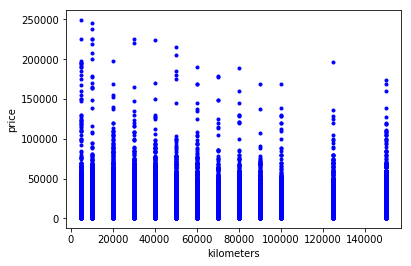

In [7]:
plt.plot(df_cars_new.kilometer, df_cars_new.price,linestyle="", marker='o', markersize=3, color="blue")
plt.xlabel('kilometers')
plt.ylabel('price')
plt.show()

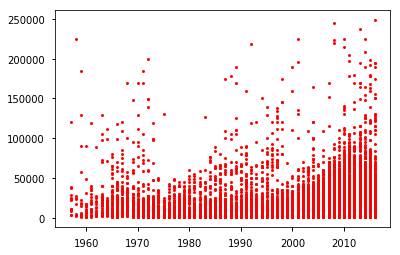

In [19]:
plt.plot(df_cars_new.yearOfRegistration, df_cars_new.price,linestyle="", marker='o', markersize=3, color="red")

## System 2

For the second system, we used the fuel type of the car and the type of car. The data looked valid to us, where a coupe car was the most expensive.

In [21]:
print(df_cars_new[['fuelType', 'price']])
print(df_cars_new[['vehicleType', 'price']])
fuelType = df_cars_new['fuelType']
vehicleType = df_cars_new['vehicleType']
price = df_cars_new['price']

       fuelType  price
1        diesel  18300
2        diesel   9800
3        benzin   1500
4        diesel   3600
5        benzin    650
6        benzin   2200
8        benzin  14500
10       benzin   2000
11       diesel   2799
12       benzin    999
14       diesel  17999
17       benzin   1750
18       diesel   7550
19       benzin   1850
20       benzin  10400
21       benzin   3699
24       benzin    500
25       diesel   2500
27       benzin   6900
28       benzin   1990
29       benzin    690
30       diesel   3300
33       benzin  18000
34       diesel   3500
39       diesel   1500
42       diesel  12500
43       benzin   6990
44       benzin   3900
45       benzin    590
46       diesel   7999
...         ...    ...
371485   diesel   4200
371487   diesel   3800
371488   benzin   2999
371490   benzin  13850
371491      lpg   3200
371494   benzin  11500
371497   benzin   4900
371498   benzin    699
371499   benzin    600
371500   benzin  20400
371501   benzin   3900
371502   be

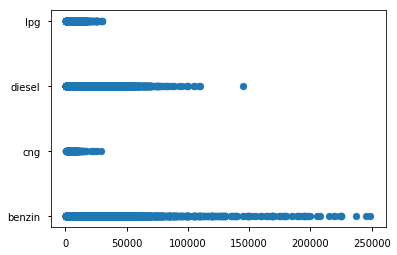

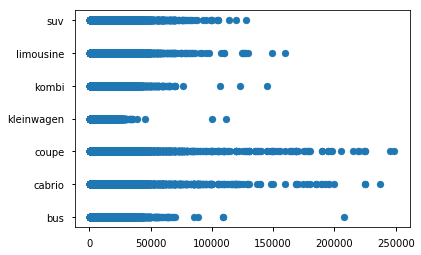

In [22]:
plt.scatter(price, fuelType)
plt.show()
plt.scatter(price, vehicleType)
plt.show()

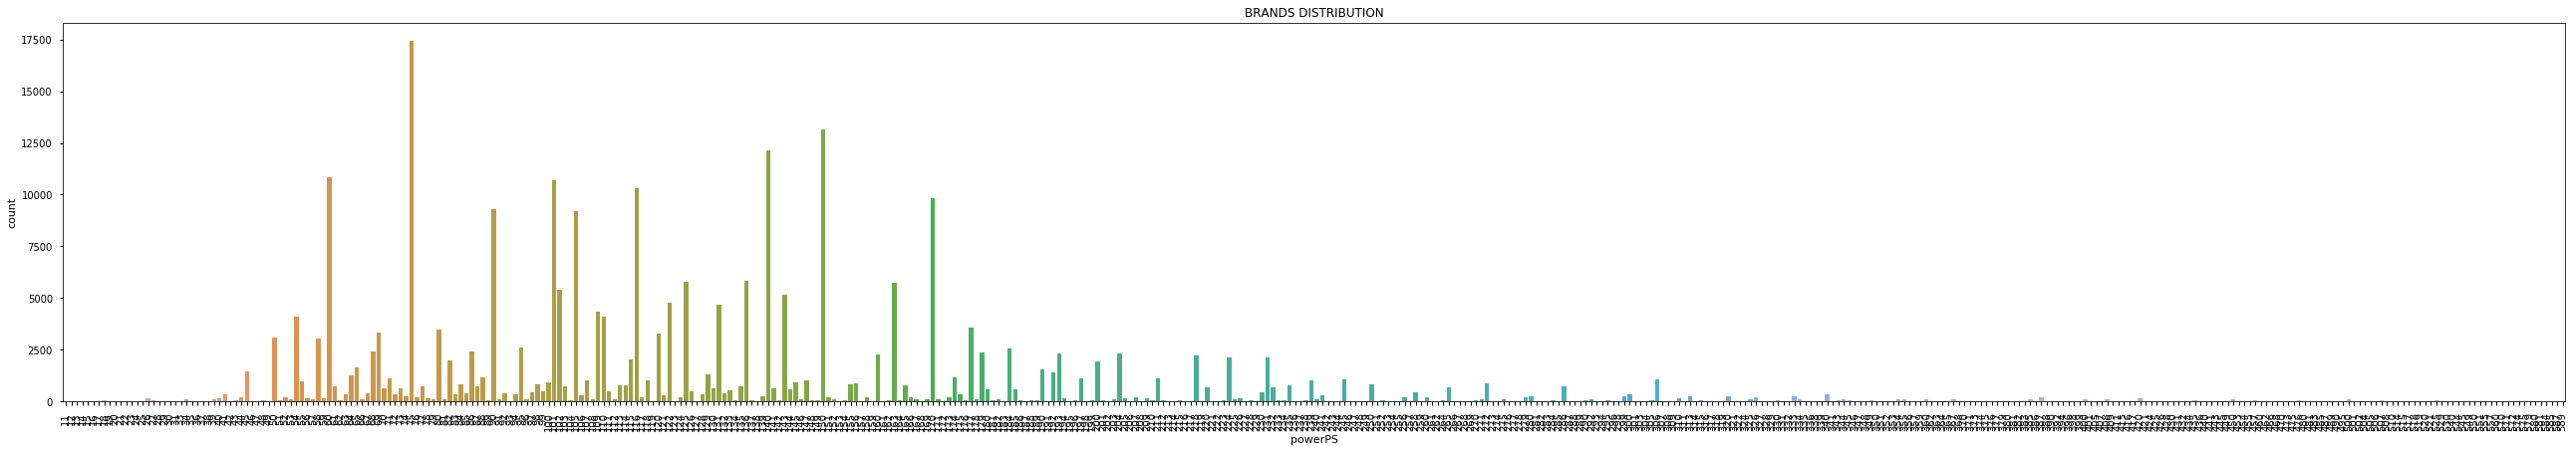

In [23]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(45,7))
plt.title('BRANDS DISTRIBUTION')
g = sns.countplot(df_cars_new['powerPS'])
rotg = g.set_xticklabels(g.get_xticklabels(), rotation=90)

## System 3
In the third system, the gearbox was compared to the amount of horsepower.

In [24]:
# Cars less then 15000 and their prices. This gives a first indication of the price where to begin at. 

gear_cars = df_cars_new[df_cars_new.kilometer < 15000]
gear_cars

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand
28,Volkswagen_T3_andere,1990,bus,1981,manuell,50,5000,benzin,volkswagen
162,Kia_Sorento__coole_Farbe_schaut......,7500,suv,2007,automatik,194,5000,benzin,kia
184,Skoda_Fabia_Combi_1.2_TSI_DSG_Style,16449,kombi,2015,automatik,110,10000,benzin,skoda
275,Audi_A6_3.0_TDI_competition_S_Line_LED_BOSE,56900,limousine,2015,automatik,326,5000,diesel,audi
303,Mazda_6._Scheckheft,2000,limousine,2004,manuell,122,5000,diesel,mazda
770,Ford_Transit_Mit_TÜV/HU._Voll_Fahrbereit!_Fest...,1290,bus,2001,manuell,101,5000,diesel,ford
805,VW_POLO_6N,550,kleinwagen,1995,manuell,45,5000,benzin,volkswagen
844,Ford_Escort_MK_1_Cosworth_H_Zulassung,34900,limousine,1968,manuell,220,5000,benzin,ford
893,Porsche_Boxster_PDK,43900,cabrio,2014,automatik,265,10000,benzin,porsche
939,Gut_gepflegt,2799,limousine,2003,manuell,135,5000,benzin,renault


In the two plots below, the can be seen that the first plot with the blue dots, become higher, a lot faster and also the prices of automatic cars are higher than manual cars.

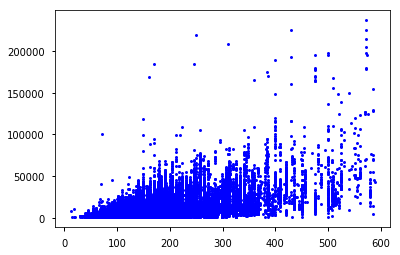

In [29]:
automatic_cars = df_cars_new[df_cars_new.gearbox == 'automatik']

plt.plot(automatic_cars.powerPS, automatic_cars.price,linestyle="", marker='o', markersize=3, color="blue")

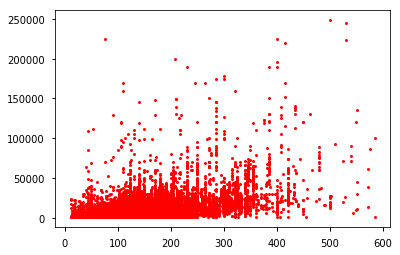

In [26]:
manual_cars = df_cars_new[df_cars_new.gearbox == 'manuell']

plt.plot(manual_cars.powerPS, manual_cars.price,linestyle="", marker='o', markersize=3, color="red")

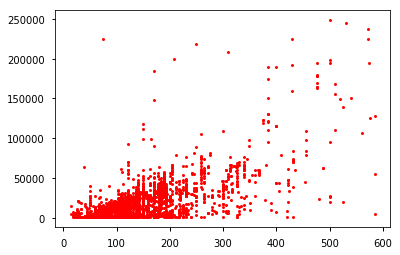

In [27]:
plt.plot(gear_cars.powerPS, gear_cars.price,linestyle="", marker='o', markersize=3, color="red")


# The fourth system
The fourth system uses the three output variables from the systems above, and creates one output.

# The final output system
In the finaloutput, the output of the fourth system is being used together with the brand. Because there are in total 39 brands, the brands are categorized according to the price of each brand.

In the plot below, the price per brand is being shown. The brands are divided into 8 categories, with in each categorie more or less the same price for a car. The 8 categories are written down below the plot

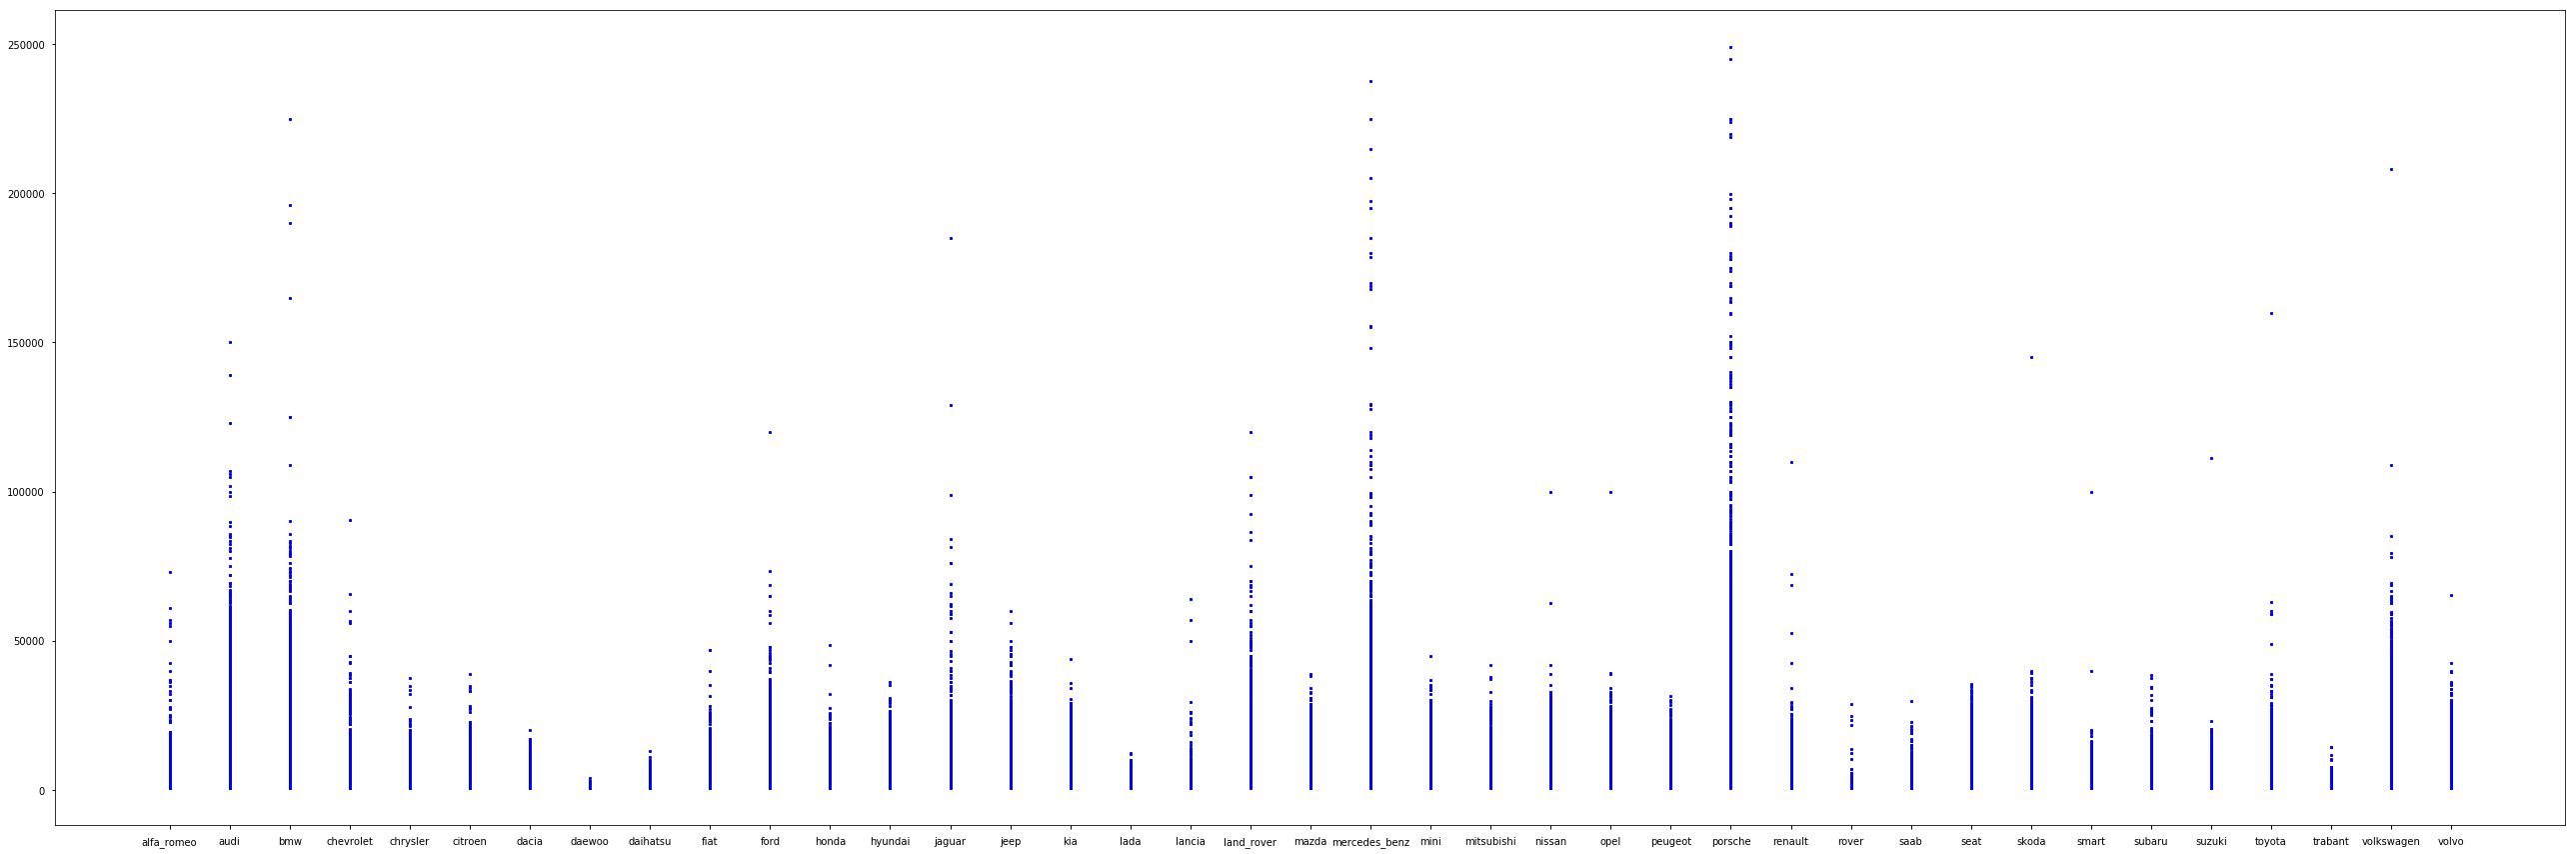

In [28]:
plt.figure(figsize=(45,15))
# gear_cars2 = df_cars_new[df_cars_new.gearbox == 'manuell']
plt.plot(df_cars_new.brand, df_cars_new.price,linestyle="", marker='o', markersize=3, color="blue")
plt.plot(df_cars_new.brand, df_cars_new.price,linestyle="", marker='o', markersize=3, color="blue")